# Обзор алгоритмов машинного обучения

## 1. Особенности работы алгоритмов

Представьте графически работу различных алгортмов машинного обучения и сохраните картинки в отчете (удобней всего в google-docs). Для этого:

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Возьмите датасет вашего варианта (см. список ниже). Найдите два **количественных** признака, от которых сильнее всего зависит целевой. Далее работайте с датасетом, содержащим только эти два признака и целевой.

In [18]:
file_path = 'bodyfat.csv'
data = pd.read_csv(file_path)
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [85]:
target = 'Neck'
n = data[target].mean()
data['Neck_Binary'] = (data[target] >= n).astype(int)
print(data.head())
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
quantitative_features.remove(target)

correlation_matrix = data[quantitative_features + ['Neck_Binary']].corr()

binary_neck_correlation = correlation_matrix['Neck_Binary'].sort_values(ascending=False)

print(binary_neck_correlation)

target = ['Neck_Binary', 'Weight', 'Chest']

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  Neck_Binary  
0  37.3   21.9    32.0     27.4   17.1            0  
1  37.3   23.4    30.5     28.9   18.2            1  
2  38.9   24.0    28.8     25.2   16.6            0  
3  37.3   22.8    32.4     29.4   18.2            0  
4  42.2   24.0    32.2     27.7   17.7            0  
Neck_Binary    1.000000
Weight         0.637467
Chest          0.624307
Wrist          0.598157
Abdomen        0.592211
Biceps         0.567438
Hip            0.553583
Forearm        0.545020
Kne

* Постройте график рассеяния всей выборки (отобразив цветом целевой класс). 

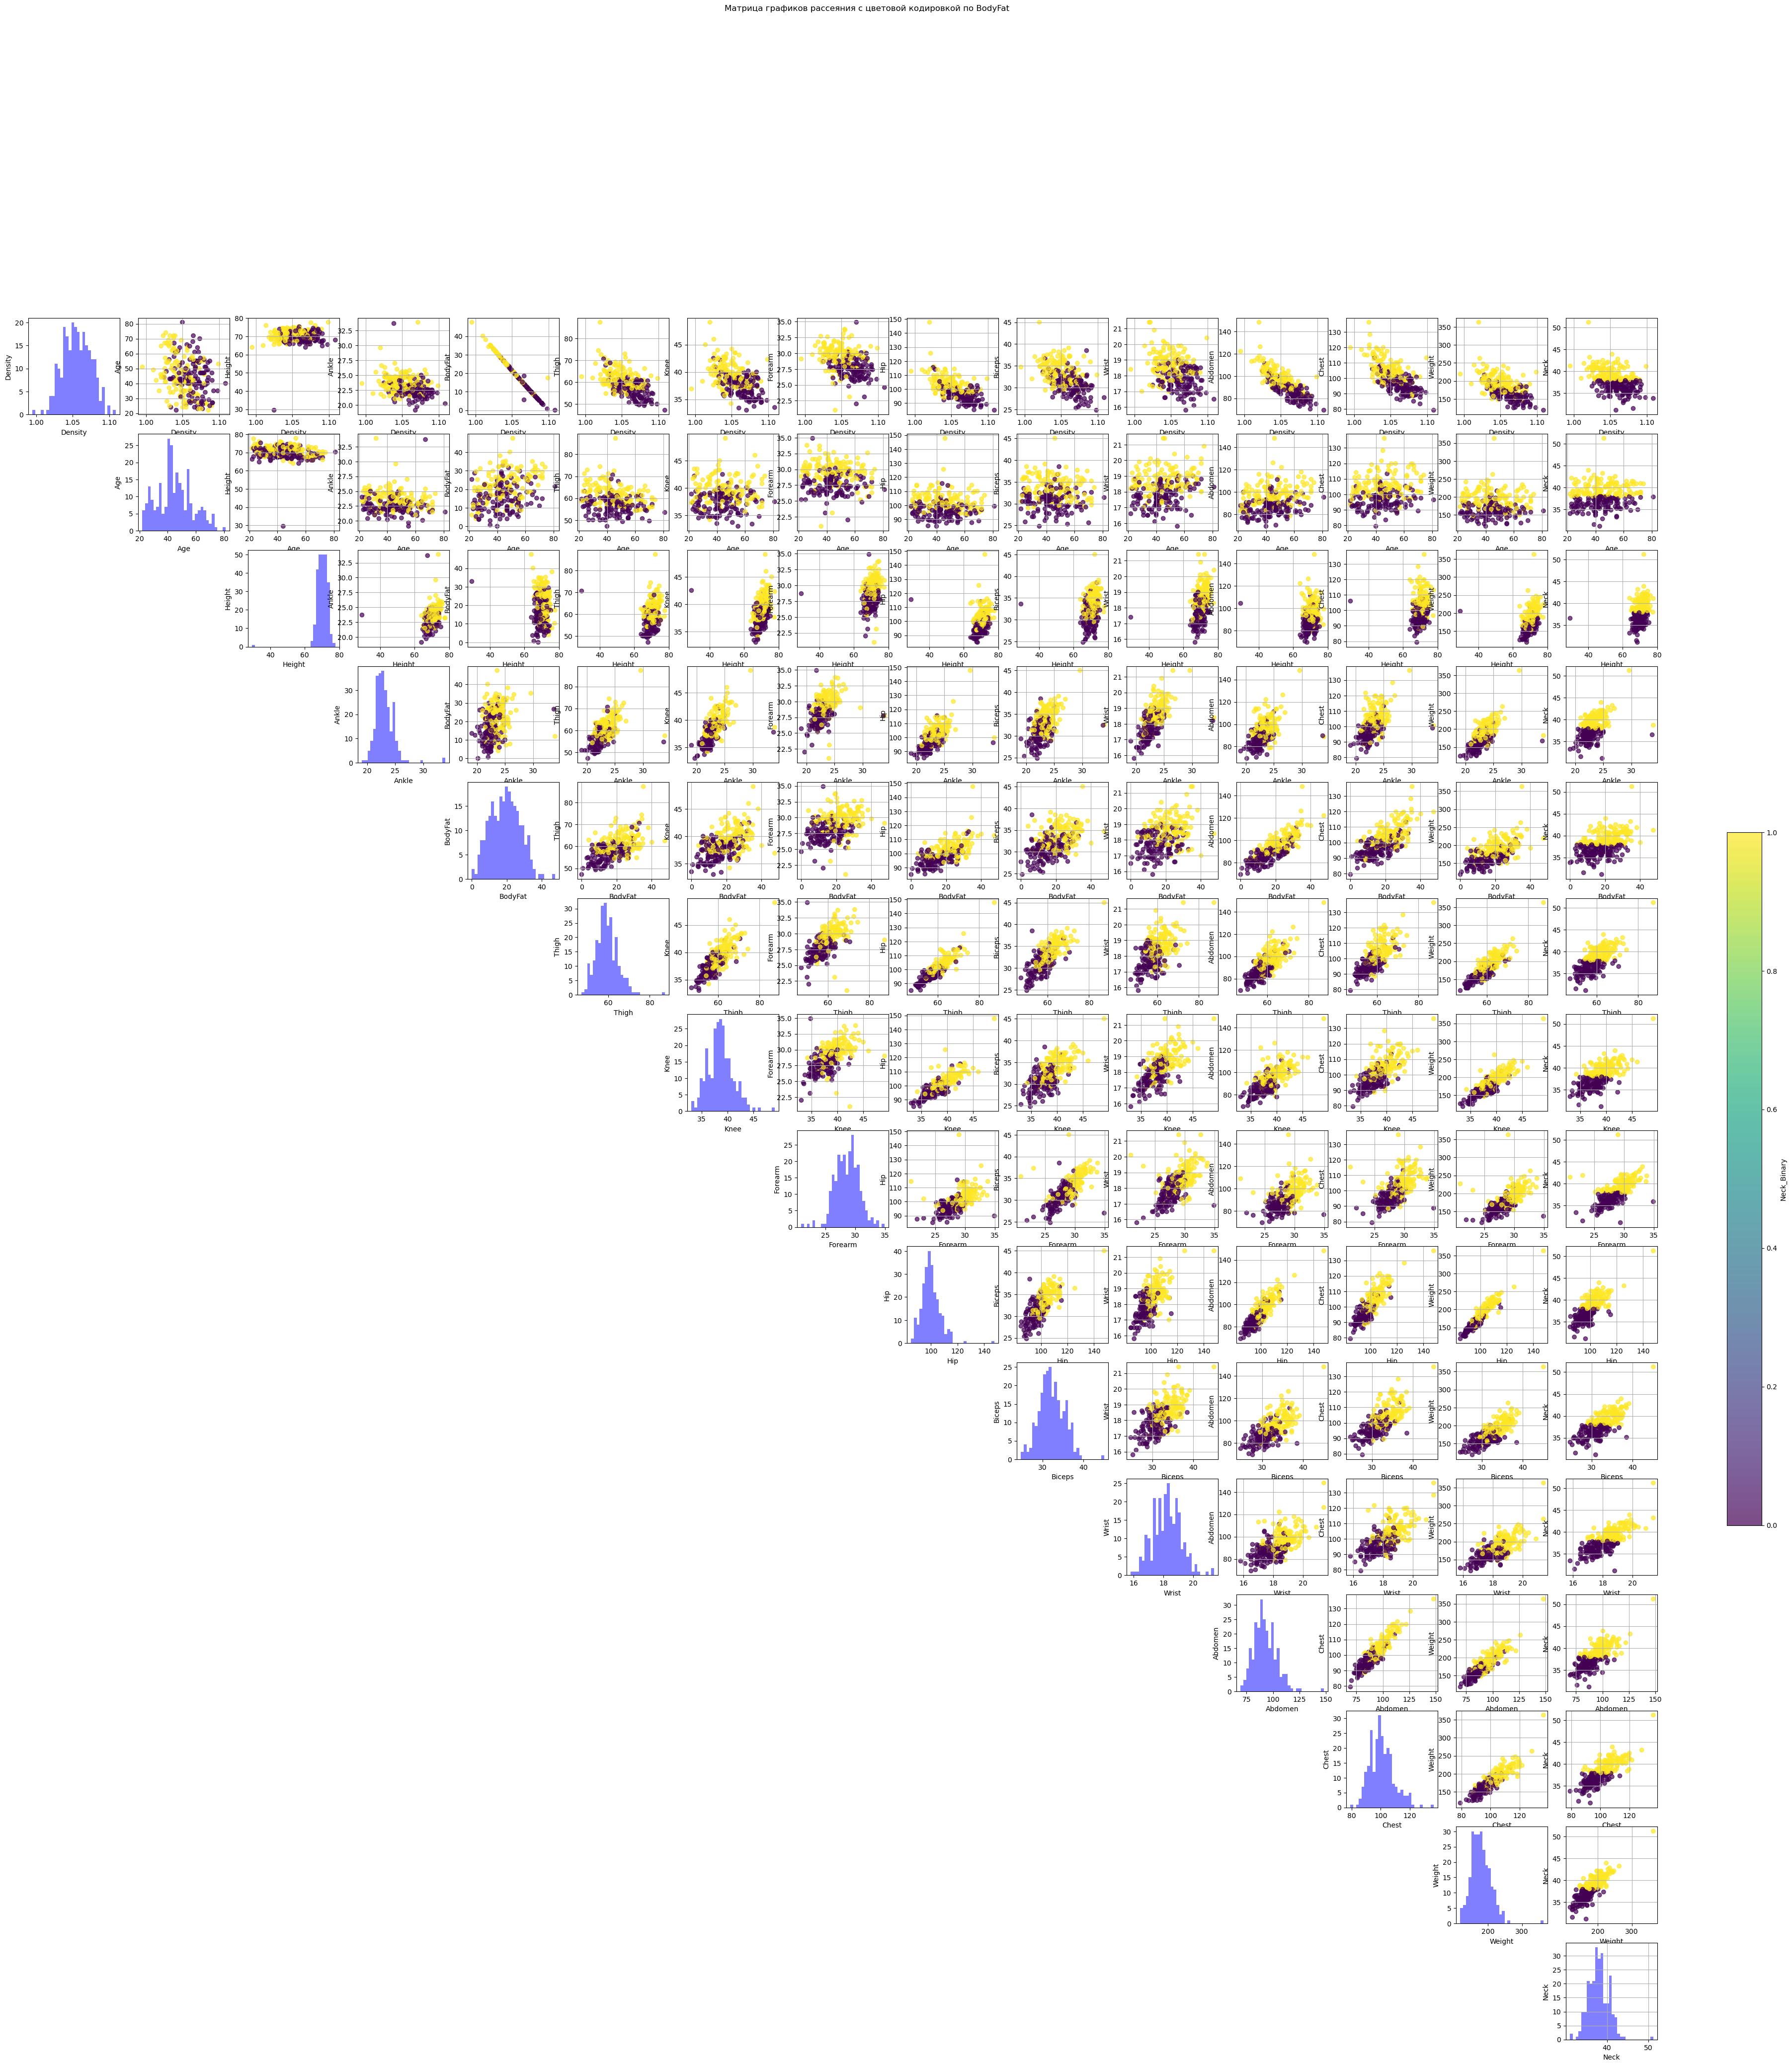

In [88]:
'''
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
''' 
quantitative_features = [
'Density',
'Age',
'Height',
'Ankle',
'BodyFat',
'Thigh',
'Knee',
'Forearm',
'Hip',
'Biceps',
'Wrist',
'Abdomen',
'Chest',
'Weight',
'Neck'
]
#'''

num_features = len(quantitative_features)
fig, axes = plt.subplots(num_features, num_features, figsize=(num_features*3, num_features*3))


for i, feature_x in enumerate(quantitative_features):
    for j, feature_y in enumerate(quantitative_features):
        

        if i <j:
            scatter = axes[i, j].scatter(data[feature_x], data[feature_y], c=data['Neck_Binary'], cmap='viridis', alpha=0.7)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)
            axes[i, j].grid()


        elif i > j:
            axes[i, j].axis('off')
        
        else:
            axes[i, j].hist(data[feature_x], bins=30, color='blue', alpha=0.5)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)

# Настраиваем цветовую карту
cbar = fig.colorbar(scatter, ax=axes[:, :], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Neck_Binary')
plt.suptitle('Матрица графиков рассеяния с цветовой кодировкой по BodyFat', y=1.02)
plt.grid()
plt.show()

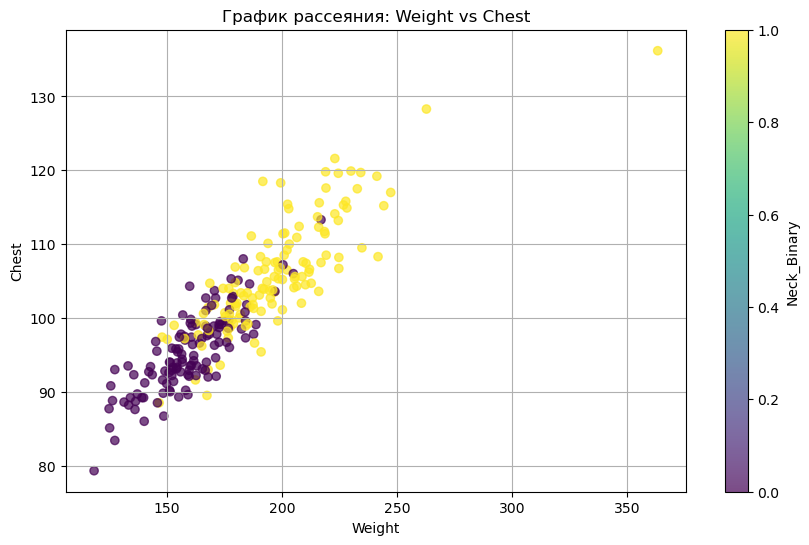

In [89]:
# График рассеяния для Abdomen и Chest
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Neck_Binary')
plt.title(f'График рассеяния: {target[1]} vs {target[2]}')
plt.xlabel(target[1])
plt.ylabel(target[2])
plt.grid()
plt.show()

* Постройте карты работы следующих алгоритмов для разных значений параметров: sklearn.tree.DecisionTreeClassifier, sklearn.neighbors.KNeighborsClassifier. Подберите параметры так, чтобы алгоритм оказался недообучен и переобучен. Отобразите те области карты, на которых лучше всего видна степень обученности модели и разместите две картинки в один ряд в отчете. При помощи кросс-валидации подтвердите факты недообучения и переобучения алгоритмов для подобранных вами параметров.

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
X = data[[target[1], target[2]]]
y = data[target[0]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [93]:
# Настройка параметров для недообучения и переобучения
n=120
dtc_parameters = [i for i in range(1,n+1)]
knn_parameters = [i for i in range(1,n+1)]

In [94]:
# Обучение и кросс-валидация для DecisionTree
dtc_scores = []
for max_depth in dtc_parameters:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    dtc_scores.append(scores.mean())

for i in range(n):
    print(f'{i+1:3} | {dtc_scores[i]:.5f}')

  1 | 0.80173
  2 | 0.80173
  3 | 0.79373
  4 | 0.78188
  5 | 0.76996
  6 | 0.75404
  7 | 0.74612
  8 | 0.74227
  9 | 0.73835
 10 | 0.72227
 11 | 0.73420
 12 | 0.73820
 13 | 0.71812
 14 | 0.71820
 15 | 0.73027
 16 | 0.73827
 17 | 0.71427
 18 | 0.71827
 19 | 0.72220
 20 | 0.72627
 21 | 0.71435
 22 | 0.72227
 23 | 0.72627
 24 | 0.73827
 25 | 0.73435
 26 | 0.71835
 27 | 0.71843
 28 | 0.72620
 29 | 0.71035
 30 | 0.72243
 31 | 0.73027
 32 | 0.73035
 33 | 0.70643
 34 | 0.73812
 35 | 0.72235
 36 | 0.73027
 37 | 0.73435
 38 | 0.73020
 39 | 0.71427
 40 | 0.73035
 41 | 0.72627
 42 | 0.74235
 43 | 0.73827
 44 | 0.72235
 45 | 0.73027
 46 | 0.70635
 47 | 0.73035
 48 | 0.73035
 49 | 0.72635
 50 | 0.72243
 51 | 0.71827
 52 | 0.74212
 53 | 0.72235
 54 | 0.72635
 55 | 0.73027
 56 | 0.72227
 57 | 0.73843
 58 | 0.73420
 59 | 0.71835
 60 | 0.71827
 61 | 0.73027
 62 | 0.72627
 63 | 0.73020
 64 | 0.73035
 65 | 0.72643
 66 | 0.71843
 67 | 0.73427
 68 | 0.73820
 69 | 0.73827
 70 | 0.73812
 71 | 0.74235
 72 | 

In [81]:
# Обучение и кросс-валидация для KNeighborsClassifier
knn_scores = []
for n_neighbors in knn_parameters:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    knn_scores.append(scores.mean())

for i in range(n):
    print(f'{i+1:3} | {knn_scores[i]:.5f}')

  1 | -0.01558
  2 | 0.19786
  3 | 0.28770
  4 | 0.32779
  5 | 0.37026
  6 | 0.39301
  7 | 0.40368
  8 | 0.41935
  9 | 0.43068
 10 | 0.45270
 11 | 0.46900
 12 | 0.46223
 13 | 0.46386
 14 | 0.46843
 15 | 0.46521
 16 | 0.46421
 17 | 0.46539
 18 | 0.47218
 19 | 0.47439
 20 | 0.47536
 21 | 0.47388
 22 | 0.47420
 23 | 0.47623
 24 | 0.47432
 25 | 0.46889
 26 | 0.46979
 27 | 0.46700
 28 | 0.47093
 29 | 0.47243
 30 | 0.47435
 31 | 0.47592
 32 | 0.47654
 33 | 0.47857
 34 | 0.48086
 35 | 0.48203
 36 | 0.48484
 37 | 0.48431
 38 | 0.48343
 39 | 0.48535
 40 | 0.48556
 41 | 0.48704
 42 | 0.48713
 43 | 0.48769
 44 | 0.48675
 45 | 0.48974
 46 | 0.48829
 47 | 0.48670
 48 | 0.48832
 49 | 0.48709
 50 | 0.48439
 51 | 0.48721
 52 | 0.48456
 53 | 0.48336
 54 | 0.48314
 55 | 0.48731
 56 | 0.48646
 57 | 0.48542
 58 | 0.48571
 59 | 0.48501
 60 | 0.48476
 61 | 0.48325
 62 | 0.48205
 63 | 0.48176
 64 | 0.48000
 65 | 0.47860
 66 | 0.47892
 67 | 0.47831
 68 | 0.47868
 69 | 0.48131
 70 | 0.48184
 71 | 0.48108
 72 |

* Постройте карты работы метода опорных векторов с разными ядрами (sklearn.svm.SVC, для рисования предсказания используйте метод decision_function)

* Сравните карты работы линейной регрессии sklearn.linear_model.LinearRegression (метод predict) с картой линейного алгоритма классификации sklearn.linear_model.LogisticRegression (метод predict_proba). Уменьшите размер выборки так, чтобы карты отличались. Выясните и запишите в отчете, как и почему отличаются линейные алгоритмы

* Постройте карту работы композиции деревьев sklearn.ensemble.ExtraTreesClassifier (метод predict_proba). Является ли он переобученным? Напишите в комментариях обоснование вашего ответа на этот вопрос.

## 2. Метрики качества

* Для логистической регрессии предскажите вероятности класса 1 для всех объектов *полной* выборки. Постройте на одном графике разными полупрозрачными цветами нормированные гистограммы вероятностей для обоих целевых классов (см. ниже "полезные кусочки кода"). Найдите визуально наилучшее пороговое значение вероятности, которое отделяет один класс от другого.

* Запрограммируйте функцию, которая вычисляет [метрики качества](https://en.wikipedia.org/wiki/Confusion_matrix): матрицу ошибок, Accuracy, TPR, FPR, TNR, FNR, Precision, Recall, F1-меру, Selectivity, Specificity, Balanced accuracy, Adjusted balanced accuracy (sklearn.metrics.balanced_accuracy_score). Сравнивая качество логистической регрессии для разных пороговых значений и разных размеров подвыборки вашего датасета, найдите и опишите недостатки метрик качества. Какие метрики качества на вашем датасете оказались лучшими (имеющими меньше всего недостатков)?

* Прикрепите в Moodle ваш ноутбук и ссылку на ваш отчет (его нужно расшарить всем для чтения кнопкой Share)

## Варианты датасетов:
1. [Hepatitis C Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) (целевой признак: пол пациента)
2. [Russian Demography Data](https://www.kaggle.com/datasets/dwdkills/russian-demography) (целевой признак: year<=2004)
3. [House prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) (целевой признак: LotArea<=9480)
4. [Cryptocurrency Closing Price Prediction](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data) (целевой признак: volatility<=0.013, удалите все строки, где не задана volatility)
5. [Video Game Sales](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) (целевой признак: Rating==E)
6. [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) (целевой признак: Amount<=22)
7. [Pokemon Dataset with Team Combat](https://www.kaggle.com/code/tuannguyenvananh/descriptive-analysis-pokemon-eda-feat-satoshi/data?select=pokemon.csv) (целевой признак: Legendary)
8. [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) (целевой признак: revenue>19млн)
9. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset) (целевой признак: Neck<=38)
10. [Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess?select=games.csv) (целевой признак: winner==white)
11. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) (целевой признак: residual sugar <= 2.2)
12. [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) (целевой признак: пол)
13. [Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) (целевой признак: horsepower <= 100)
14. [Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data) (целевой признак: возраст <= 40)
15. [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) (целевой признак: Family <= 1)
16. [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) (целевой признак: lunch)
17. [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) (целевой признак: возраст <= 30)
18. [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) (целевой признак: MaritalStatus==Married - бинарная классификация)
19. [Acoustic Extinguisher Fire Dataset](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset) (целевой признак: FUEL==gasoline - бинарная классификация)
20. [Pumpkin Classification : Autoviz](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) (целевой признак: Compactness<=0.7)
21. [Dry Bean Dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset) (целевой признак: Class==DERMASON)
22. [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) (целевой признак: ocean_proximity == '<1H OCEAN')
23. [Data Science for Good: PASSNYC](https://www.kaggle.com/datasets/passnyc/data-science-for-good?resource=download) (целевой признак: Percent Black <= 40)
24. [Spotify Song Attributes](https://www.kaggle.com/datasets/geomack/spotifyclassification) (целевой признак: acousticness<=0.1)
25. [Real Estate DataSet](https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset) (целевой признак: PTRATIO>=18.84)
26. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass) (целевой признак: Type==2)
27. [Car information dataset](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset) (целевой признак: model_year>=77)
28. [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) (целевой признак: Sleep Disorder == None)
29. [Другой датасет](https://www.kaggle.com/datasets) по согласованию с преподавателем практики и с изменением целевого признака (**датасеты у всех должны быть разными**). 

## Полезные кусочки кода

### отображение статистики:
```
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')
```

### поиск "сильных" признаков:
```
import seaborn as sns
sns.set(rc={'figure.dpi':300})
label = 'укажите ваш целевой признак'
features = [c for c in data.columns if c != label and data.dtypes[c] != 'object']
X = data.loc[:,features]
y = data[label]
mi = sklearn.feature_selection.mutual_info_classif(X, y)
ax = sns.barplot(x=mi, y=features)
```

### график рассеяния:
```
ax = sns.scatterplot(data=data, x='имя столбца1', y='имя столбца2', hue=label, palette="deep")
```

### карта предсказания классификатора (цвет - вероятность класса 1):
```
x='имя столбца1'; y='имя столбца2'
model = конструктор модели

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (data[x].min(), data[x].max())
ylim = (data[y].min(), data[y].max())
model.fit(data.loc[:,[x,y]], data[label])
grid_x = np.linspace(*xlim, 100)
grid_y = np.linspace(*ylim, 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]
# в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
```

### гистограмма:
```
# здесь предполагается, что предсказанные вероятности сохранены в столбец probability датафрейма data
ax = sns.histplot(data=data, x="probability", hue=label, kde=True)
```